# Hitting time distribution
Given an absorbing Markov chain, we are interested in the distribution of the hitting time starting from any initial state. In what follows we consider the simple random walk on a random graph.

In [337]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

In [264]:
num_transient = 10
num_terminal = 2
p_transient = 0.3
p_terminal = 0.2
is_terminal = lambda x: x>=num_transient

In [325]:
def generate_random_graph(num_transient, num_terminal, p_transient, p_terminal):
    while True:
        G = nx.erdos_renyi_graph(num_transient, p_transient)
        if nx.is_connected(G):
            break
    for k in range(num_terminal):
        n_connections = max(random.binomial(num_transient, p_terminal), 1)
        nbrs = random.choice(range(num_transient), n_connections, replace=False)
        terminal_idx = k + num_transient
        G.add_edges_from([(terminal_idx, nbr) for nbr in nbrs])
    G.graph['num_transient'] = num_transient
    G.graph['num_terminal'] = num_terminal
    G.graph['p_transient'] = p_transient
    G.graph['p_terminal'] = p_terminal

    return G
def draw_graph(G):
    is_terminal_array = [is_terminal(n) for n in G.nodes()]
    nx.draw(G, with_labels=True, node_color = 1-np.array(is_terminal_array), cmap=plt.get_cmap('viridis'))

In [347]:
def simulate(G, n_trials = 200):
    data = {n:[] for n in range(G.graph['num_transient'])} # (starting state, episodes) pairs
    for x_0 in data: # each starting state
        for trial in range(n_trials):
            episode, time = [x_0], 0
            terminal = False
            while not terminal:
                x_t = random.choice(list(G.neighbors(episode[time])), 1)[0]
                episode.append(x_t)
                time += 1
                terminal = is_terminal(x_t)
            data[x_0].append(episode)
    return data

def get_transition_matrix(G):
    adj = nx.adjacency_matrix(G).todense()
    for terminal in range(G.graph['num_transient'], len(G)):
        adj[terminal] = [int(n==terminal) for n in range(len(G))]
    return adj/ np.sum(adj, axis=1)[:, np.newaxis]

In [327]:
G = generate_random_graph(num_transient, num_terminal, p_transient, p_terminal)

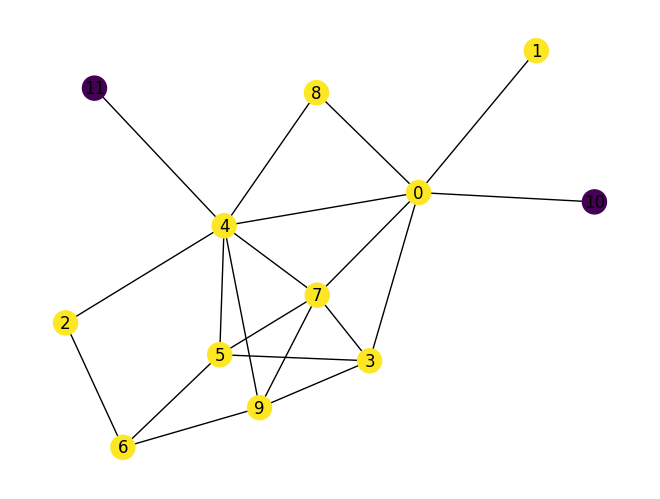

In [328]:
draw_graph(G)

In [348]:
P = get_transition_matrix(G)

In [359]:
with np.printoptions(precision=2, suppress=True):
    print(np.linalg.matrix_power(P, 100))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.58 0.42]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.58 0.42]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.43 0.56]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.49 0.5 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.42 0.58]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.46 0.53]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.45 0.54]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.48 0.51]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5  0.5 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.46 0.53]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


# Visualize the simulated walks

In [363]:
data = simulate(G, n_trials=200)

In [364]:
# compute episode lengths
data_len = {k: list(map(len, data[k])) for k in data}

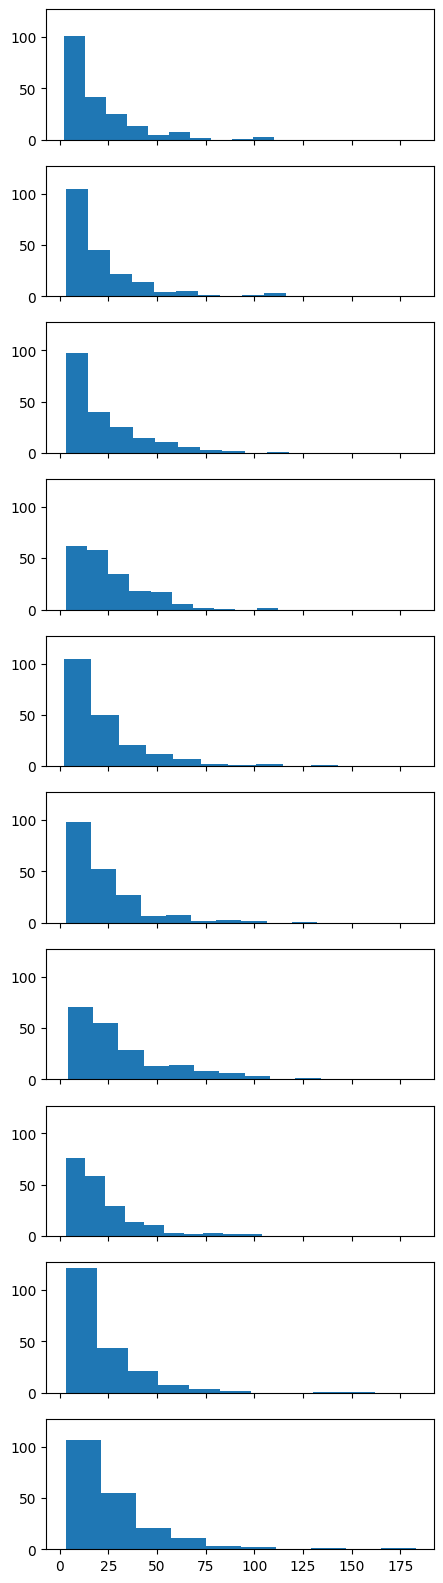

In [365]:
fig, ax = plt.subplots(num_transient, sharex=True, sharey=True, figsize=(5,2*num_transient))
for k in data_len:
    ax[k].hist(data_len[k])